<a href="https://colab.research.google.com/github/leo-contigo/ML/blob/main/05_%ED%94%BC%EC%B2%98_%EC%8A%A4%EC%BC%80%EC%9D%BC%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")


import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [10, 6]

#### ML_07_수업자료.html

# 피처 스케일링

- 평균
- 분산
- 표준편차
- 표준 점수 = Z-Score
- 표준화
- 정규화

- 두 특성(길이와 무게)의 값이 놓인 범위가 다르다. => 스케일(Scale)이 다르다
- 방의 넓이를 재는데 한사람은 cm, 다른사람은 incn로 재는것과 같다.

# 표준화와 정규화

>- 표준화는???  데이타의 피처 각각이 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환
>- 정규화란???  서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념

--------------------------------------------------

In [ ]:
fish_data = [10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_data

[10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

### 넘파이 방식으로 통계치

## 평균

In [ ]:
# 평균

sum(fish_data)/len(fish_data), np.mean(fish_data)

(12.084615384615384, 12.084615384615386)

## 분산 - 평균으로부터 얼마만큼 떨어져 있는가?
>### np. var()

In [ ]:
# 분산 = 편차 ** 2 / 데이터 수
# 편차 = 데이터 - 평균

# (데이터 - 평균) ** 2  / 데이터 수 

np.var(fish_data)

1.6782248520710064

In [ ]:
temp = 0 
avg = np.mean(fish_data)

for item in fish_data:
     temp += (item - avg)**2
temp / len(fish_data)

1.6782248520710061

In [ ]:
# + 연산자 : 대칭 a+b , b+a 항상같은 결과
# += 연산자 : 비대칭 왼쪽타입 변수에 의해 결정 a += b a를 유지

## 표준편차 - 분산의 루트 √

>### np.sqrt(분산)

In [ ]:
np.sqrt(np.var(fish_data))

1.2954631805153731

### 데이터프레임 방식 통계치

In [ ]:
# 데이타프레임에서의 통계치 

df_fish = pd.DataFrame(fish_data)
df_fish

,0
0,10.5
1,10.6
2,11.0
3,11.2
4,11.3
5,11.8
6,11.8
7,12.0
8,12.2
9,12.4


In [ ]:
# 통계량

df_fish.describe()

,0
count,13.000000
mean,12.084615
std,1.348361
min,10.500000
25%,11.200000
50%,11.800000
75%,12.400000
max,15.000000


--------------------------------------------------

### 넘파이 방식

## 표준점수 = zscore

>### - (데이터 - 평균 ) / 표준편차
>### - 0에서 표준편차의 몇배만큼 떨어져있는가???

In [ ]:
fish_data = [10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

# 리스트에서 넘파이로 변경
fish_arr = np.array(fish_data)

# 평균 avg
avg = np.mean(fish_data)
print(f'평균 : {avg}')

# 표준편차 std
std = np.sqrt(np.var(fish_data))
print(f'표준편차 : {std}')

#표준점수
# (fish_arr - avg) / std
print(f'표준점수 : {(fish_arr - avg) / std}')

평균 : 12.084615384615386
표준편차 : 1.2954631805153731
표준점수 : [-1.22320372 -1.14601125 -0.83724138 -0.68285645 -0.60566398 -0.21970164
 -0.21970164 -0.0653167   0.08906823  0.24345317  0.70660798  1.71011006
  2.25045733]


In [ ]:
fish_weight = [7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

# 리스트에서 넘파이로 변경
fish_arr2 = np.array(fish_weight)

# 평균
avg2 = np.mean(fish_weight)

# 표준편차
std2 = np.sqrt(np.var(fish_weight))

# 표준점수
(fish_arr2-avg)/std

array([-3.53897776, -3.9249401 , -1.84074347, -1.763551  , -2.61266814,
       -1.60916606, -1.68635853, -1.763551  ,  0.08906823,  1.01537785,
        0.08906823,  5.87850333,  6.03288826])

--------------------------------------------------

--------------------------------------------------

# 빙어 + 도미 생선 분류 테스트

>### - 데이타수집 : http://bit.ly/bream_smelt

In [ ]:
# 1) 데이터 준비 
# 35개는 도미 + 14개는 빙어 

# 도미+빙어의 길이 

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

# 도미+빙어의 무게 

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]



# 라벨 데이타 생성 = y
# 35개는 도미 → 1 
# 10개는 빙어 → 0

fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [ ]:
# 데이터프레임으로 생성 1-1

df_fish = pd.DataFrame([fish_length , fish_weight, fish_target])
df_fish

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,25.4,26.3,26.5,29.0,29.0,29.7,29.7,30.0,30.0,30.7,...,11.2,11.3,11.8,11.8,12.0,12.2,12.4,13.0,14.3,15.0
1,242.0,290.0,340.0,363.0,430.0,450.0,500.0,390.0,450.0,500.0,...,9.8,8.7,10.0,9.9,9.8,12.2,13.4,12.2,19.7,19.9
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 데이터프레임으로 생성 1-2
# pd.DataFrame( 데이터 ).T : 전치행렬
df_fish = pd.DataFrame([fish_length , fish_weight, fish_target]).T
df_fish.sample(3)

,0,1,2
35,9.8,6.7,0.0
38,11.0,9.7,0.0
21,34.0,685.0,1.0


In [ ]:
# 데이터프레임으로 생성 1-3
# 컬럼명 지정해서
df_fish = pd.DataFrame([fish_length , fish_weight, fish_target]).T
df_fish.columns = ['fish_length' , 'fish_weight', 'label']

df_fish.sample(3)

,fish_length,fish_weight,label
42,11.8,9.9,0.0
2,26.5,340.0,1.0
18,33.5,610.0,1.0


In [ ]:
df_fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fish_length  49 non-null     float64
 1   fish_weight  49 non-null     float64
 2   label        49 non-null     float64
dtypes: float64(3)
memory usage: 1.3 KB


In [ ]:
# label 형변환 - 실수형 float 을 정수형 int 으로
# 컬럼명.타입을(문자,실수,정수형)으로 변경한다.
df_fish['label'] = df_fish['label'].astype(int)

In [ ]:
df_fish.sample(3)

,fish_length,fish_weight,label
22,34.5,620.0,1
36,10.5,7.5,0
19,33.5,650.0,1


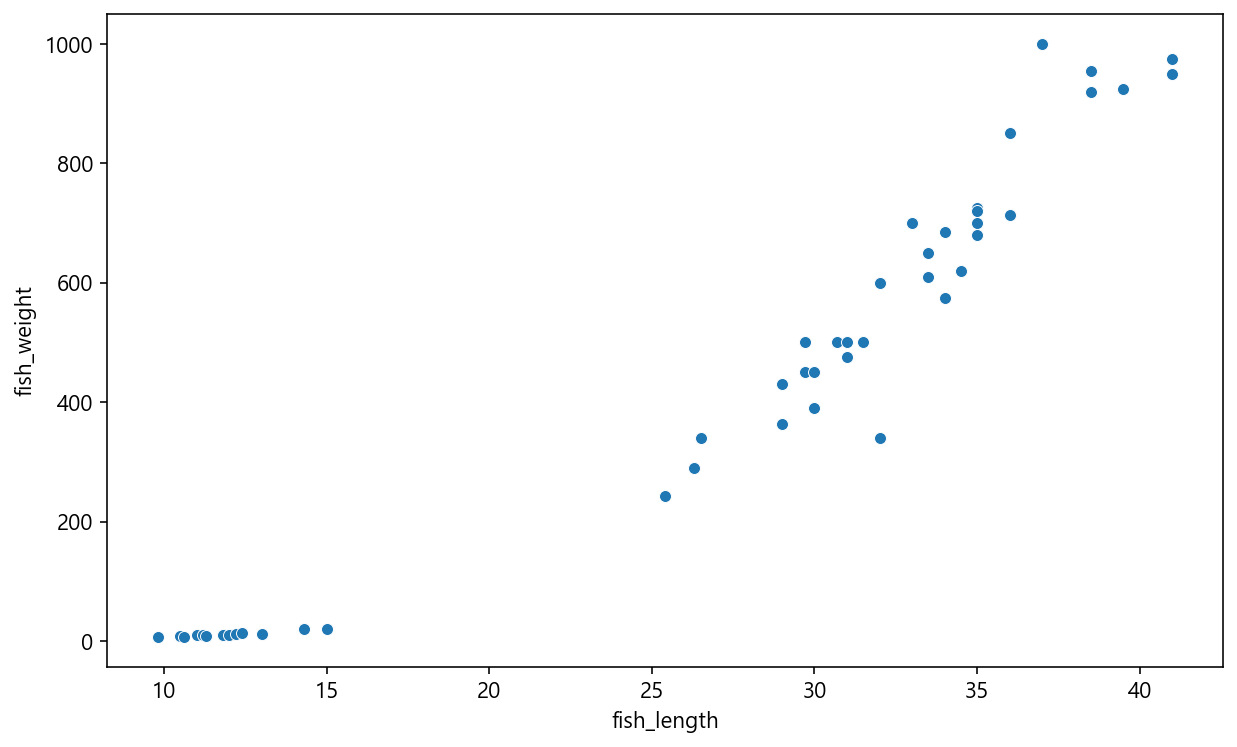

In [ ]:
# 시각화 1-1

sns.scatterplot(x = 'fish_length' , y = 'fish_weight' , data = df_fish);

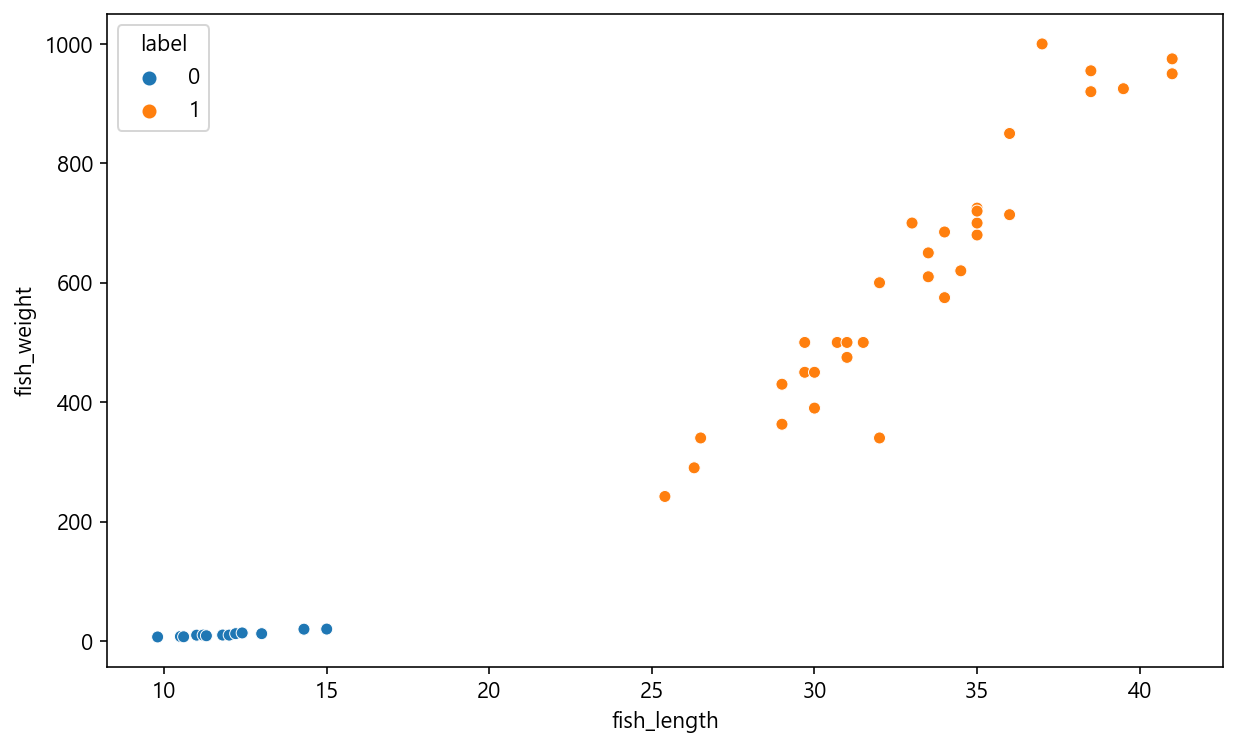

In [ ]:
# 시각화 1-2

sns.scatterplot(x = 'fish_length' , y = 'fish_weight' , data = df_fish, hue='label');

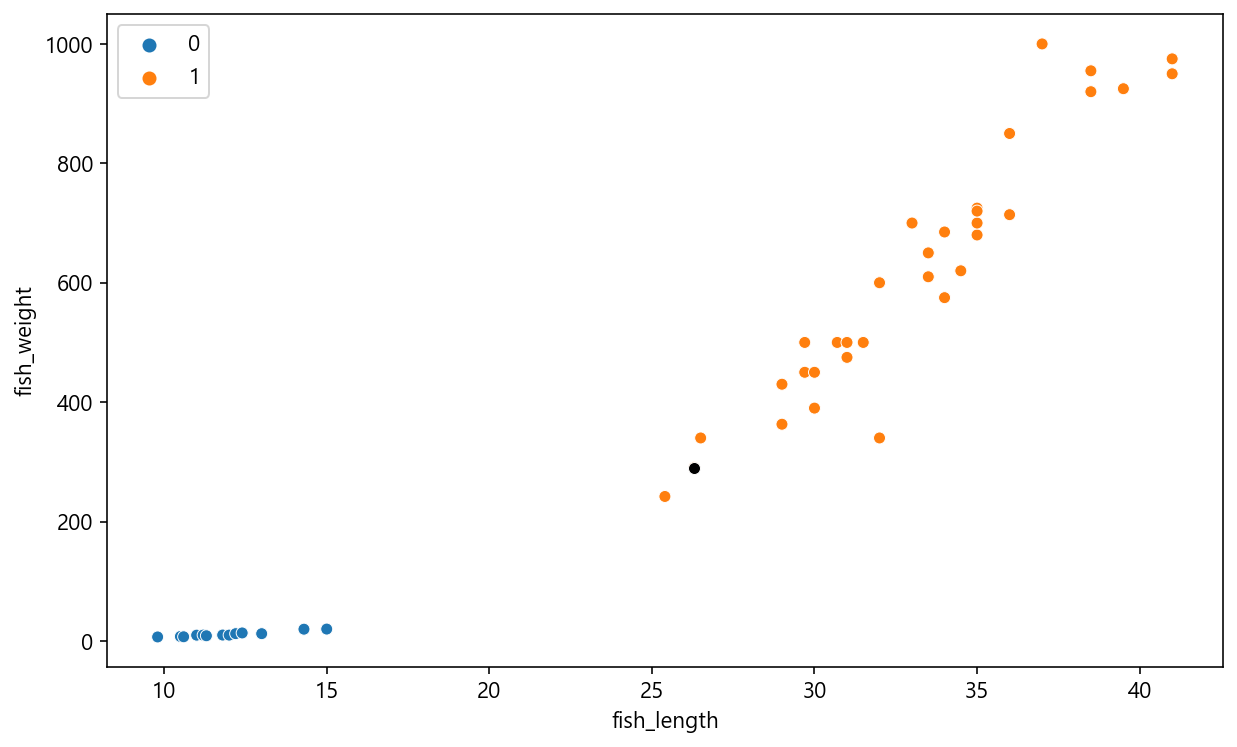

In [ ]:
# 시각화 2
sns.scatterplot(x = 'fish_length' , y = 'fish_weight' , data = df_fish, hue='label')

# 새로운 데이터 26.3, 290.0
sns.scatterplot(x = [26.3] , y = [290.0] ,  color = 'black');

--------------------------------------------------

## 스케일링?

In [ ]:
# sklearn 모듈 임포트

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# 2) 모델 생성 후 학습시키기

X = df_fish[['fish_length', 'fish_weight']]
y = df_fish['label']

X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.2,
                                                    
                                                   # 비율 맞게 학습 ; train, test 둘다 확인 후 사용
                                                   stratify = y)

In [ ]:
print(y_train.value_counts())
print()
print(y_train.values)

1    28
0    11
Name: label, dtype: int64

[1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1
 1 0]


In [ ]:
y_test.value_counts(), y_test.values

(1    7
 0    3
 Name: label, dtype: int64,
 array([1, 1, 1, 1, 0, 1, 1, 1, 0, 0]))

In [ ]:
# 모델 생성 및 학습

model_knn = KNeighborsClassifier()

model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# 새로운 데이터 26.3, 290.0 의 예측????

model_knn.predict([[26.3, 290.0]])

array([1])

In [ ]:
# 다른 데이타 25, 150 => 도미(1) 이어야하는데 예측값은 빙어(0)

model_knn.predict([[25, 150]])

array([0])

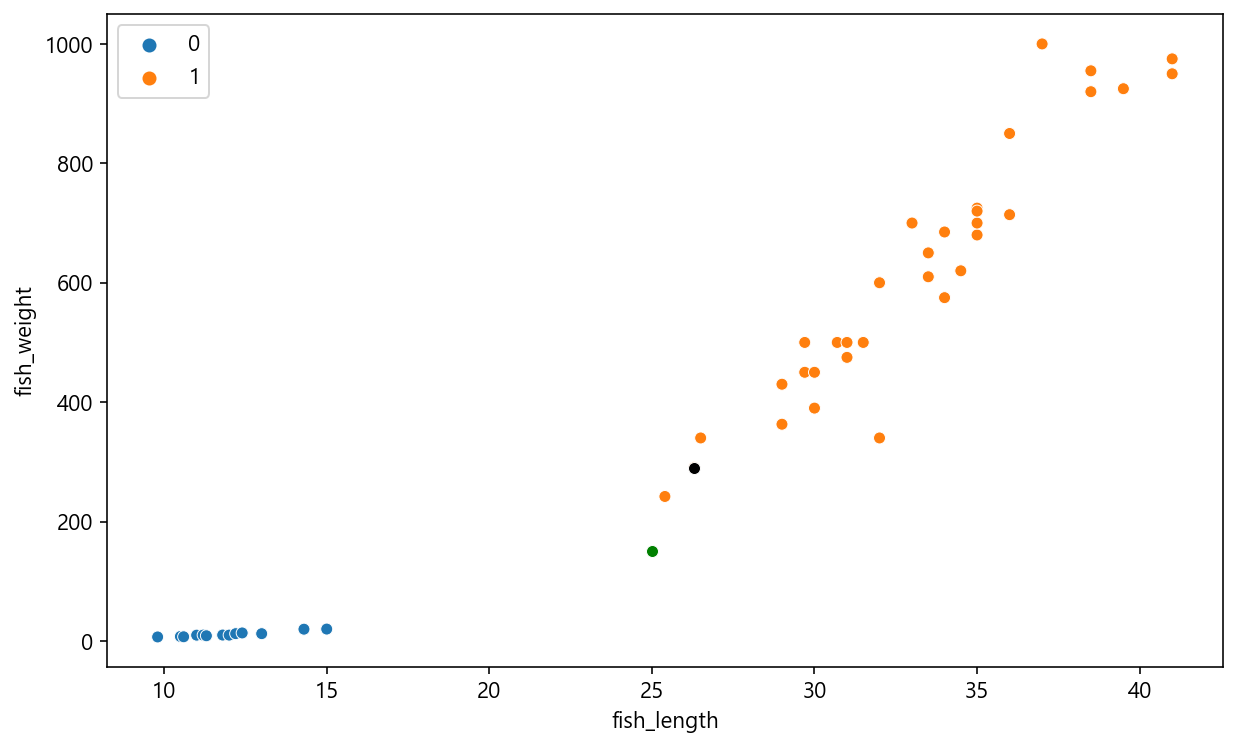

In [ ]:
# 시각화 3
sns.scatterplot(x = 'fish_length' , y = 'fish_weight' , data = df_fish, hue='label')

# 새로운 데이터 26.3, 290.0
# 다른 데이타 25, 150
sns.scatterplot(x = [26.3] , y = [290.0] ,  color = 'black')
sns.scatterplot(x = [25.0] , y = [150.0] ,  color = 'green');

### 표준화 시킨 후 모델 학습 → 테스트

In [ ]:
# X 표준화

X.head()

,fish_length,fish_weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0


In [ ]:
# 넘파이 

X['fish_length'].head()

0    25.4
1    26.3
2    26.5
3    29.0
4    29.0
Name: fish_length, dtype: float64

In [ ]:
# 평균, 표준편차

X['fish_length'].mean() , X['fish_length'].std()

(27.055102040816323, 10.242803596193967)

In [ ]:
# 판다스 표준편차와 넘파이 표준편차 비교

X['fish_length'].std() , np.std(X['fish_length'].values)

(10.242803596193967, 10.137746423175521)

In [ ]:
# 판다스 표준편차와 넘파이 표준편차 비교 - ddof 자유도 ???
# ddof = 0 :  판다스 표준편차와 넘파이 표준편차 일치 

X['fish_length'].std() , np.std(X['fish_length'].values), X['fish_length'].std(ddof=0)

(10.242803596193967, 10.137746423175521, 10.137746423175521)

In [ ]:
# 표준 점수는? - 길이
# (데이터 - 평균) / 표준편차

X['fish_length_scale'] = (X['fish_length'] - X['fish_length'].mean()) / X['fish_length'].std(ddof=0)

In [ ]:
# 표준 점수는? - 무게
# (데이터 - 평균) / 표준편차

X['fish_weight_scale'] = (X['fish_weight'] - X['fish_weight'].mean()) / X['fish_weight'].std(ddof=0)

In [ ]:
X.head()

,fish_length,fish_weight,fish_length_scale,fish_weight_scale
0,25.4,242.0,-0.163261,-0.623504
1,26.3,290.0,-0.074484,-0.475710
2,26.5,340.0,-0.054756,-0.321759
3,29.0,363.0,0.191847,-0.250941
4,29.0,430.0,0.191847,-0.044646


In [ ]:
X2 = X[['fish_length_scale','fish_weight_scale']]

y = df_fish['label']

X_train, X_test, y_train, y_test = train_test_split(X2, y, 
                                                    random_state=11, 
                                                    test_size=0.2, 
                                                    stratify=y)

In [ ]:
# 모델 생성 및 학습

model_knn = KNeighborsClassifier()

model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# 스케일 후 도미로 예측 결과가 변경됨

# 스케일 전 예측은 빙어였음

model_knn.predict([[25, 150]])

array([1])

In [ ]:
# 시각화 4-1
X_temp = X2.copy()
X_temp['label'] = y

X_temp.head()

,fish_length_scale,fish_weight_scale,label
0,-0.163261,-0.623504,1
1,-0.074484,-0.475710,1
2,-0.054756,-0.321759,1
3,0.191847,-0.250941,1
4,0.191847,-0.044646,1


In [ ]:
# 새로운 데이터 ( 25, 150 ) → 표준 점수로 변경

l = (25 - X['fish_length'].mean()) / X['fish_length'].std(ddof=0)
w = (25 - X['fish_weight'].mean()) / X['fish_weight'].std(ddof=0)

l, w

(-0.20271783836674304, -1.2916532293463285)

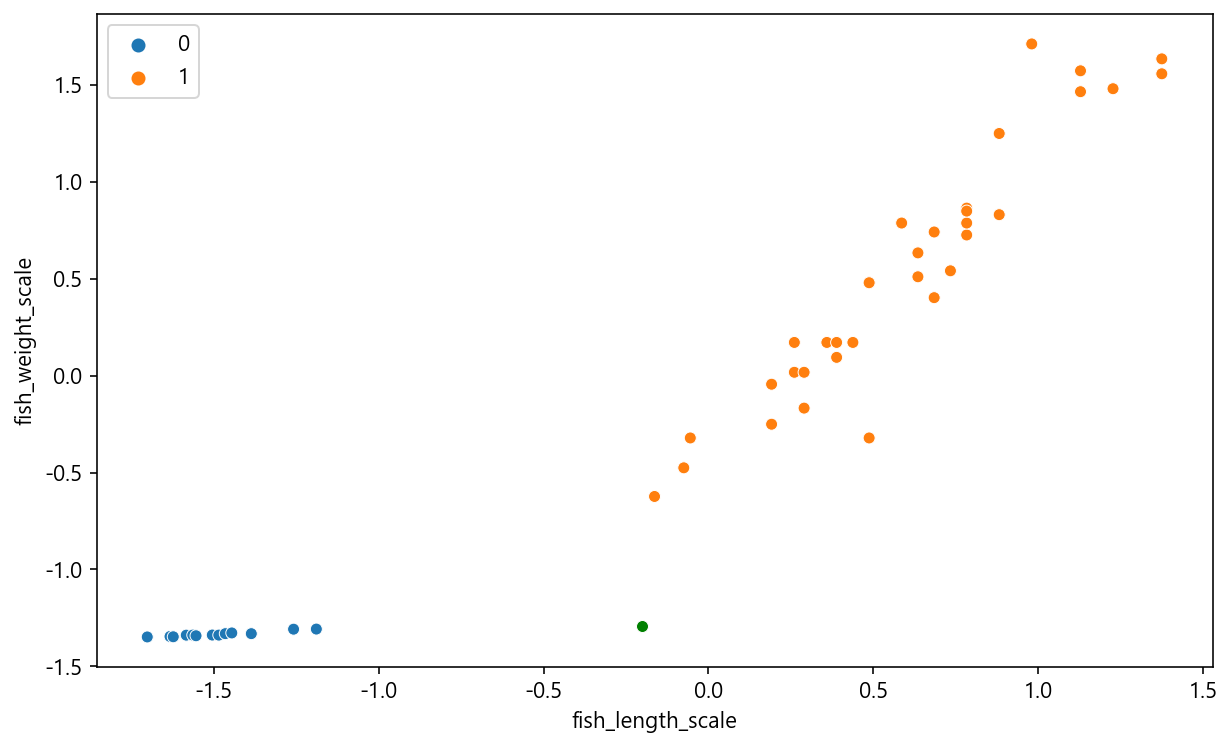

In [ ]:
# 시각화 4-2
sns.scatterplot(x = 'fish_length_scale' , y = 'fish_weight_scale' , data = X_temp, hue='label')

# 새로운 데이터 ( 25, 150 )
sns.scatterplot(x = [l] , y = [w] ,  color = 'green');

--------------------------------------------------

# KNN의 이웃점과의 거리와 이웃점 인덱스

>## knn모델명.kneighbors( [ [x , y] ] )
>### 예) distance, indexes = model_kn.kneighbors([[26.3,290.0]])

In [ ]:
print(dir(KNeighborsClassifier))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_algorithm_metric', '_check_feature_names', '_check_n_features', '_estimator_type', '_fit', '_get_param_names', '_get_tags', '_kneighbors_reduce_func', '_more_tags', '_pairwise', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', 'fit', 'get_params', 'kneighbors', 'kneighbors_graph', 'predict', 'predict_proba', 'score', 'set_params']


In [ ]:
model_knn.predict([[-0.20271783836674304, -0.9067744363349078]])

array([1])

In [ ]:
# 새로운 데이타 25, 150 표준점수로 변경 
l = (25-X['fish_length'].mean()) / X['fish_length'].std(ddof=0)
w = (150-X['fish_weight'].mean()) / X['fish_weight'].std(ddof=0)


# distance 는 이웃간 거리
# k_idx 는 이웃의 인덱스 

distance, k_idx = model_knn.kneighbors([[l, w]])
distance, k_idx

(array([[0.28600552, 0.60343696, 0.76537512, 0.90499623, 1.04713462]]),
 array([[20, 21, 29,  9, 17]], dtype=int64))

In [ ]:
model_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
# 이웃점의 정보는?
# 이웃점 데이터프레임 

X_train.iloc[[20, 21, 29,  9, 17]]

,fish_length_scale,fish_weight_scale
0,-0.163261,-0.623504
2,-0.054756,-0.321759
3,0.191847,-0.250941
13,0.487771,-0.321759
8,0.290488,0.016935


In [ ]:
n_df = X_temp.loc[[20, 21, 29,  9, 17]]
n_df

,fish_length_scale,fish_weight_scale,label
20,0.685053,0.401813,1
21,0.685053,0.740507,1
29,0.980977,1.710401,1
9,0.359537,0.170886,1
17,0.586412,0.786692,1


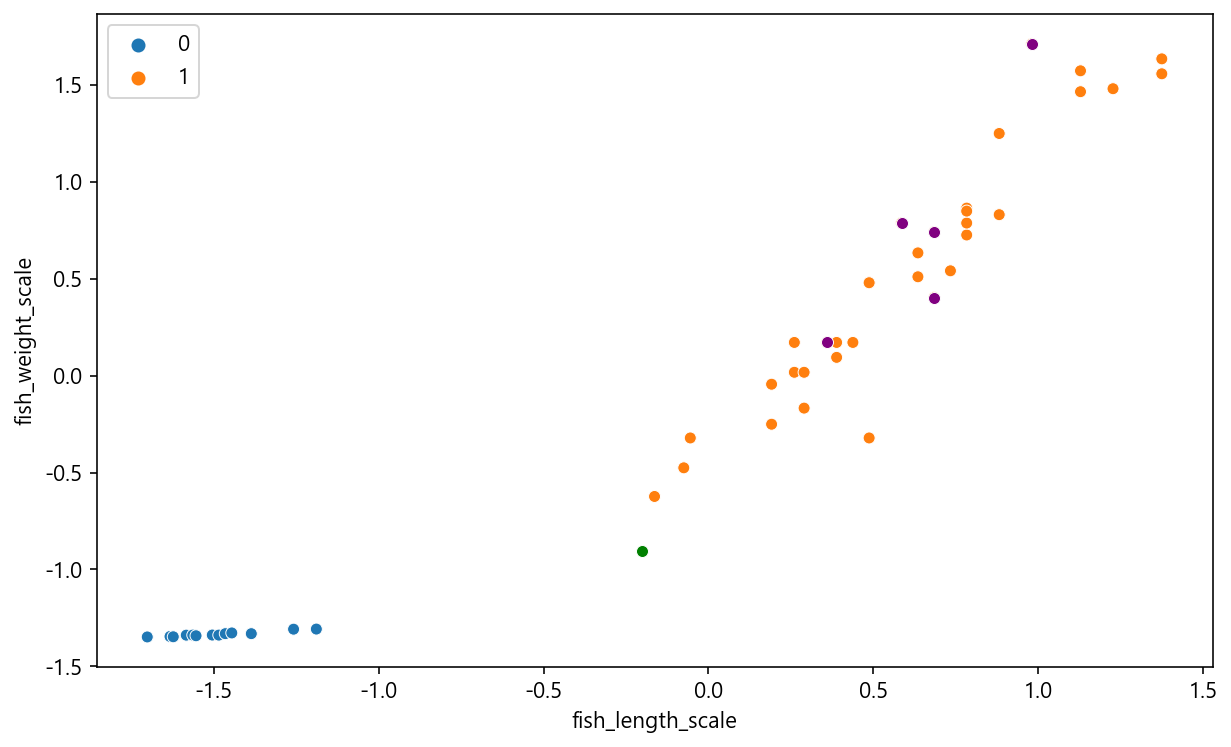

In [ ]:
# 시각화 5

# X_train 그래프
sns.scatterplot(x = 'fish_length_scale' , y = 'fish_weight_scale' , data = X_temp, hue='label')


# 새로운 데이터 ( 25, 150 )
sns.scatterplot(x = [l] , y = [w] ,  color = 'green')

# 이웃점 추가  
sns.scatterplot(x = 'fish_length_scale' , y = 'fish_weight_scale', data = n_df , color = 'purple');

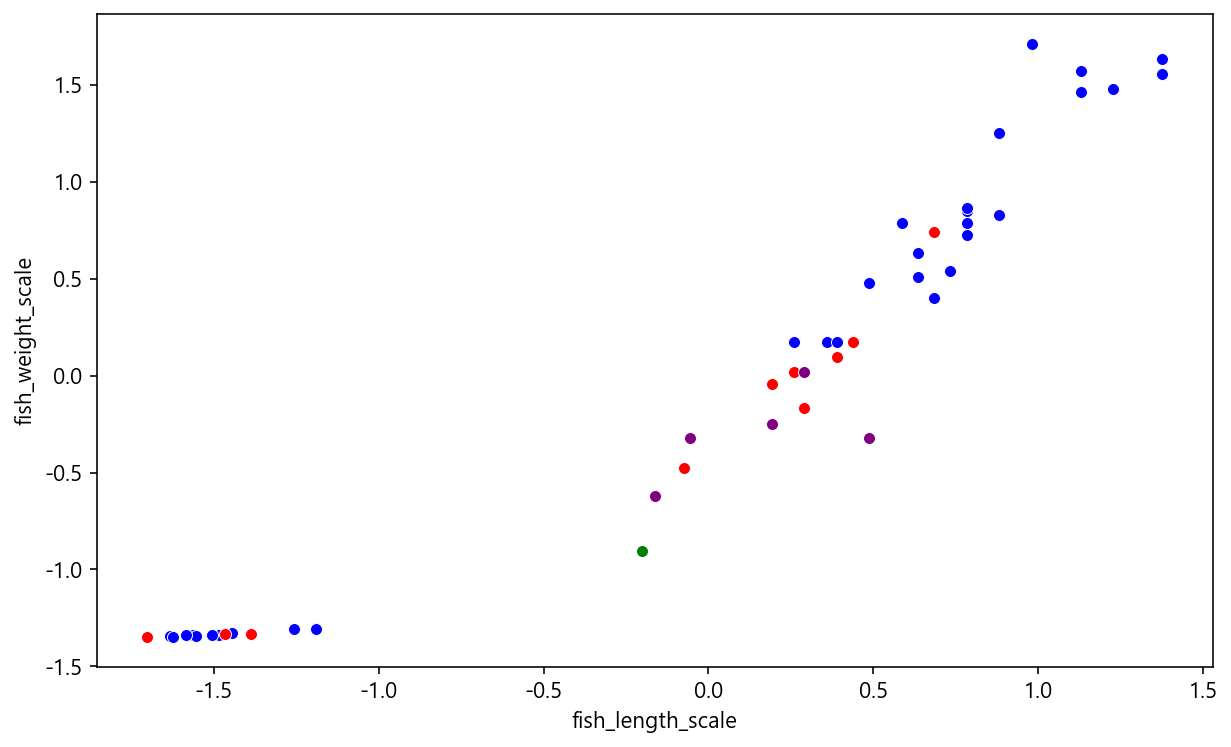

In [ ]:
# 시각화 5

# X_train 그래프
sns.scatterplot(x = 'fish_length_scale' , y = 'fish_weight_scale' , data = X_train, color='blue')

# X_test 그래프
sns.scatterplot(x = 'fish_length_scale' , y = 'fish_weight_scale' , data = X_test, color='red')


# 새로운 데이터 ( 25, 150 )
sns.scatterplot(x = [l] , y = [w] ,  color = 'green')

# 이웃점 추가  
sns.scatterplot(x = 'fish_length_scale' , y = 'fish_weight_scale', 
                data = X_train.iloc[[20, 21, 29,  9, 17]] , 
                color = 'purple');

--------------------------------------------------

# skitlearn의 이용 - 스케일링

## StandardScaler
>### - 평균이 0이고 분산이 1인 정규분포 형태로 변환
- 데이터의 특징을 모르는 경우 가장 무난하게 사용됨

- 관련 모듈 임포트
     - from sklearn.preprocessing import StandardScaler
     

- 적용과정
    - scaler = StandardScaler()
    - scaler.fit(Data)
    - Data_scaled = scaler.transform(Data)


In [ ]:
# sklearn 모듈 임포트

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 붓꽃 데이터(토이 데이터) 관련
from sklearn.datasets import load_iris

# 스케일러 관련 모듈 임포트 
from sklearn.preprocessing import MinMaxScaler, StandardScaler

### 붓꽃 데이터 

In [ ]:
# 1) 데이터 준비
iris = load_iris()

# 데이터 확인
# iris

# 데이터 프레임으로 
df_iris = pd.DataFrame(iris.data, columns = iris.feature_names)

# 라벨은?  (넘파이)
iris_label = iris.target

In [ ]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
df_iris.shape, iris_label.shape

((150, 4), (150,))

In [ ]:
# Standard 스케일 적용
# 변수명 = StandardScaler()

# 객체 생성
scaler_st = StandardScaler()
type(scaler_st)

# 입력데이터 적용
scaler_st.fit(df_iris)

# 데이터 변환 후 저장 → 넘파이 출력
df_iris_scale1 = scaler_st.transform(df_iris)
df_iris_scale1

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [ ]:
# 데이터프레임

df_iris_scale1 = pd.DataFrame(df_iris_scale1)
df_iris_scale1.columns = iris.feature_names
df_iris_scale1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [ ]:
# 라벨 추가

df_iris_scale1['label'] = iris_label
df_iris_scale1.sample(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
47,-1.506521,0.328414,-1.340227,-1.315444,0
0,-0.900681,1.019004,-1.340227,-1.315444,0


In [ ]:
# 모델 적용 → 평가점수 확인 1

# 학습데이터
X = df_iris_scale1
y = iris_label

X_train , X_test , y_train , y_test = train_test_split( X , y )


model_knn = KNeighborsClassifier()
model_knn.fit(X_train , y_train)

KNeighborsClassifier()

In [ ]:
# 정답에 대한 예측?

accuracy_score(y_test , model_knn.predict(X_test))

1.0

In [ ]:
# 모델 적용 → 평가점수 확인 2 

# 학습데이터
X = df_iris_scale1
y = iris_label

X_train , X_test , y_train , y_test = train_test_split( X , y , 
                                                       random_state=11, 
                                                       stratify=y)


model_knn = KNeighborsClassifier()
model_knn.fit(X_train , y_train)

# 정답에 대한 예측?

accuracy_score(y_test , model_knn.predict(X_test))

0.9736842105263158

## MinMaxScaler
>### 데이타값을 0과 1 사이의 범위값으로 변환한다. 음수값이 있으면 -1에서 1값으로 변환한다.

- 관련 모듈 임포트 
     - from sklearn.preprocessing import MinMaxScaler


- 적용과정 
    - scaler = MinMaxScaler()
    - scaler.fit(Data)
    - Data_scaled = scaler.transform(Data)

In [ ]:
# 객체 생성 
scaler_m = MinMaxScaler() 

# 입력 데이터 적용 
scaler_m.fit(df_iris) 

# 데이타 변환 후 저장 → 넘파이 배열 
df_iris_scale2 = scaler_m.transform(df_iris)
# df_iris_scale2

In [ ]:
df_iris_scale2 = pd.DataFrame(df_iris_scale2)
df_iris_scale2.columns = iris.feature_names
df_iris_scale2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [ ]:
# 모델 적용 → 평가점수 확인 2 

# 학습데이터
X = df_iris_scale1
y = iris_label

X_train , X_test , y_train , y_test = train_test_split( X , y , 
                                                       random_state=11, 
                                                       stratify=y)


model_knn = KNeighborsClassifier()
model_knn.fit(X_train , y_train)

KNeighborsClassifier()

In [ ]:
# 정답에 대한 예측?
accuracy_score(y_test , model_knn.predict(X_test))

0.9736842105263158

### 스케일전 상태 원본 데이터를 이용해서 학습 및 평가 테스트

In [ ]:
X = df_iris
y = df_iris_scale1['label']
X_train, X_test, y_train, y_test = train_test_split( X, y, 
                                                    random_state=11, 
                                                    stratify=y )

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
accuracy_score(y_test, model_knn.predict(X_test))

0.9736842105263158

In [ ]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### 스케일링 변환시 주의 사항

- 가능하다면 전체 데이터의 스케일링 변환을 적용한 뒤 학습과 테스트 데이터로 분리한다.
- 여의치 않다면 테스트 데이터 변환시에는 fit(), fit_transform()을 적용하지 않고
- 학습 데이터로 이미 fit()된 Scaler 객체를 이용해 transform() 으로 변경한다.

In [ ]:
# 테스트 데이터 준비
train_array = np.arange(0, 11).reshape(-1, 1)
test_array = np.arange(0, 6).reshape(-1, 1)

print(train_array)
print()
print(test_array)

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]]


In [ ]:
print(test_array.ndim, '/ ' , test_array.shape)
print(train_array.ndim, '/ ' , train_array.shape)

2 /  (6, 1)
2 /  (11, 1)


In [ ]:
# MinMax Scaler 적용


# 객체 생성 
scaler_m = MinMaxScaler() 

# 입력 데이터 적용 
scaler_m.fit(train_array) 

# 데이타 변환 후 저장 → 넘파이 배열 
train_array_scale = scaler_m.transform(train_array)
train_array_scale

array([[0. ],
       [0.1],
       [0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6],
       [0.7],
       [0.8],
       [0.9],
       [1. ]])

In [ ]:
print(train_array)
print()
print(train_array_scale)

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]

[[0. ]
 [0.1]
 [0.2]
 [0.3]
 [0.4]
 [0.5]
 [0.6]
 [0.7]
 [0.8]
 [0.9]
 [1. ]]


In [ ]:
# 스케일러 변환기를 이용해서 다시 test 데이터로 입력데이터 넣고 다시 변형한다면 ?
# 1/5 로 축소

scaler_m = MinMaxScaler() 

# 입력 데이터 적용 
scaler_m.fit(test_array) 
test_array_scale = scaler_m.transform(test_array)
test_array_scale

print(test_array)
print()
print(test_array_scale)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]]

[[0. ]
 [0.2]
 [0.4]
 [0.6]
 [0.8]
 [1. ]]


### 결론 

#### 가능하다면 전체 데이터의 스케일링 변환을 적용한 뒤 학습과 테스트 데이터로 분리

In [ ]:
### 학습 데이터의 스케일 비율을 그대로 이용하려면?

# 객체 생성 
scaler_m = MinMaxScaler() 

# 입력 데이터 적용 
scaler_m.fit(train_array) 

train_array_scale = scaler_m.transform(train_array)

# 데이타 변환 후 저장 → 넘파이 배열 
# fit() 과정없이 바로 transform()

test_array_scale = scaler_m.transform(test_array)

print(train_array_scale)
print()
print(test_array_scale)

[[0. ]
 [0.1]
 [0.2]
 [0.3]
 [0.4]
 [0.5]
 [0.6]
 [0.7]
 [0.8]
 [0.9]
 [1. ]]

[[0. ]
 [0.1]
 [0.2]
 [0.3]
 [0.4]
 [0.5]]
